# Import

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split   
from linear_regression import LinearRegression

# Data

In [21]:
path = './auto_insurance_sweden.txt'

# load data
data = pd.read_csv(path, sep=None, decimal=',', engine='python')
X = data.X.values.reshape(-1,1)
y = data.Y.values.reshape(-1,1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

# standardize x
sx = StandardScaler()
X_train = sx.fit_transform(X_train)
X_test = sx.transform(X_test)

# standardize y
sy = StandardScaler()
y_train = sy.fit_transform(y_train)
y_test = sy.transform(y_test)

## Plot data

Text(0.5, 1.0, 'Standardized')

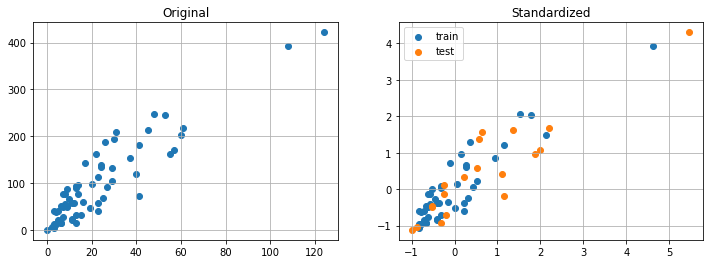

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X, y)
plt.grid()
plt.title('Original')
plt.subplot(122)
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.grid()
plt.legend()
plt.title('Standardized')


# Linear Regression - Training

In [22]:
lr = LinearRegression()
# gradient descent
lr.fit_gd(X_train, y_train, 70, 0.1)
lr.test_gd(X_test, y_test)
# newtons method
lr.fit_nm(X_train, y_train, 1)
lr.test_nm(X_test, y_test)
# normal equation
lr.fit_ne(X_train, y_train)  
lr.test_ne(X_test, y_test)


BATCH GRADIENT DESCENT
Epoch 0 - Loss: 0.500000
Epoch 1 - Loss: 0.420671
Epoch 2 - Loss: 0.356415
Epoch 3 - Loss: 0.304368
Epoch 4 - Loss: 0.262209
Epoch 5 - Loss: 0.228061
Epoch 6 - Loss: 0.200401
Epoch 7 - Loss: 0.177996
Epoch 8 - Loss: 0.159848
Epoch 9 - Loss: 0.145148
Epoch 10 - Loss: 0.133242
Epoch 11 - Loss: 0.123597
Epoch 12 - Loss: 0.115785
Epoch 13 - Loss: 0.109457
Epoch 14 - Loss: 0.104332
Epoch 15 - Loss: 0.100180
Epoch 16 - Loss: 0.096817
Epoch 17 - Loss: 0.094093
Epoch 18 - Loss: 0.091887
Epoch 19 - Loss: 0.090100
Epoch 20 - Loss: 0.088652
Epoch 21 - Loss: 0.087480
Epoch 22 - Loss: 0.086530
Epoch 23 - Loss: 0.085761
Epoch 24 - Loss: 0.085137
Epoch 25 - Loss: 0.084633
Epoch 26 - Loss: 0.084224
Epoch 27 - Loss: 0.083893
Epoch 28 - Loss: 0.083624
Epoch 29 - Loss: 0.083407
Epoch 30 - Loss: 0.083231
Epoch 31 - Loss: 0.083089
Epoch 32 - Loss: 0.082973
Epoch 33 - Loss: 0.082880
Epoch 34 - Loss: 0.082804
Epoch 35 - Loss: 0.082743
Epoch 36 - Loss: 0.082693
Epoch 37 - Loss: 0.082653

# Predict & Plot

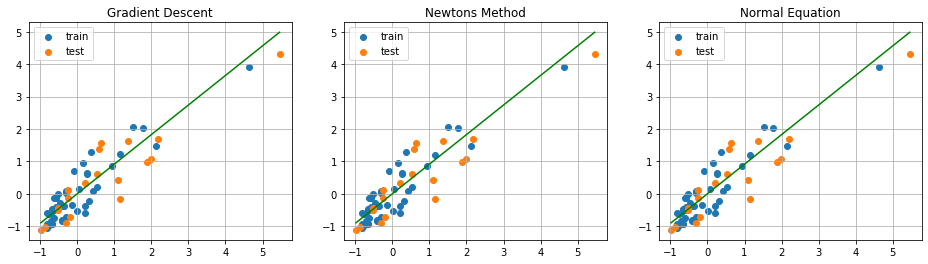

In [24]:
# predict
xmin = np.min([np.min(X_train), np.min(X_test)])
xmax = np.max([np.max(X_train), np.max(X_test)])
xline = np.array((xmin,xmax))
h_gd = lr.predict_gd(xline)
h_nm = lr.predict_nm(xline)
h_ne = lr.predict_ne(xline)
# plot
plt.figure(figsize=(16,4))
methods = ['Gradient Descent', 'Newtons Method', 'Normal Equation']
for i, h in enumerate([h_gd, h_nm, h_ne]):
    plt.subplot(131+i)
    plt.scatter(X_train, y_train, label='train')
    plt.scatter(X_test, y_test, label='test')
    plt.plot(xline, h, c='g')
    plt.grid()
    plt.legend()
    plt.title(methods[i])